# 2. 불필요한 특수문자 제거

## 2-a. 계획
- 1. 특수문자 제거
  2. 영어 전부 소문자로 변경
  3. text 길이 너무 긴거 삭제

## 2-b. 데이터 불러오기

### 2-b-1. 파일 읽기

In [2]:
import pandas as pd
df = pd.read_csv("1_cleansed_news.csv", encoding="utf-8")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602719 entries, 0 to 1602718
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1602719 non-null  object
 1   created_date    1602719 non-null  object
 2   created_time    1602719 non-null  object
 3   media           1602719 non-null  object
 4   title           1602719 non-null  object
 5   text            1601160 non-null  object
 6   url             1602719 non-null  object
dtypes: object(7)
memory usage: 85.6+ MB


### 2-b-2. 결측치 제거

In [3]:
df = df.copy().dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1601160 entries, 0 to 1602718
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1601160 non-null  object
 1   created_date    1601160 non-null  object
 2   created_time    1601160 non-null  object
 3   media           1601160 non-null  object
 4   title           1601160 non-null  object
 5   text            1601160 non-null  object
 6   url             1601160 non-null  object
dtypes: object(7)
memory usage: 97.7+ MB


### 2-b-3. 데이터 확인

In [4]:
df.head(3)

,search_keyword,created_date,created_time,media,title,text,url
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경기 위축 우...,https://n.news.naver.com/mnews/article/013/000...
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경...,https://n.news.naver.com/mnews/article/001/000...


In [5]:
df.iloc(0)[0]["text"]

'강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판매한다.대출 대상은 사업기간이 3개월 이상으로 종업원 수 50인 미만인 소기업  소상공인을 대상으로 하며  부동산업  증기탕 등 일부 업종은 대상에서 제외된다.소상공인은 지역신용보증재단에 보증신청과 심사를 거쳐 특례보증에 의한 보증서를 발급받아야 하며  대출한도는 기업당 최고 1 000만원  대출기간은 5년 이내이고 대출금리는 기준금리 +1.0%이다.'

## 2-c. 테스트 : 불필요한 특수문자 제거 
- 특수문자 분포를 확인하고, 어떤 특수문자를 남길 지 판단한다.
- 나머지 불필요한 특수문자는 제거한다.

### 2-c-1. 테스트할 샘플 만들기 : row 10000개만

In [6]:
df_sample = df.copy().head(10000)
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   search_keyword  10000 non-null  object
 1   created_date    10000 non-null  object
 2   created_time    10000 non-null  object
 3   media           10000 non-null  object
 4   title           10000 non-null  object
 5   text            10000 non-null  object
 6   url             10000 non-null  object
dtypes: object(7)
memory usage: 625.0+ KB


### 2-c-2. 테스트 : 특수문자 분포 확인

C:\Users\USER\.conda\envs\brnn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9426 (\N{CIRCLED LATIN SMALL LETTER C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\.conda\envs\brnn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65308 (\N{FULLWIDTH LESS-THAN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\.conda\envs\brnn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\.conda\envs\brnn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\.conda\envs\brnn\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12305 (\N{RIGHT BLACK LENTICULAR BRACKET}) missing from current font.
  fig.c

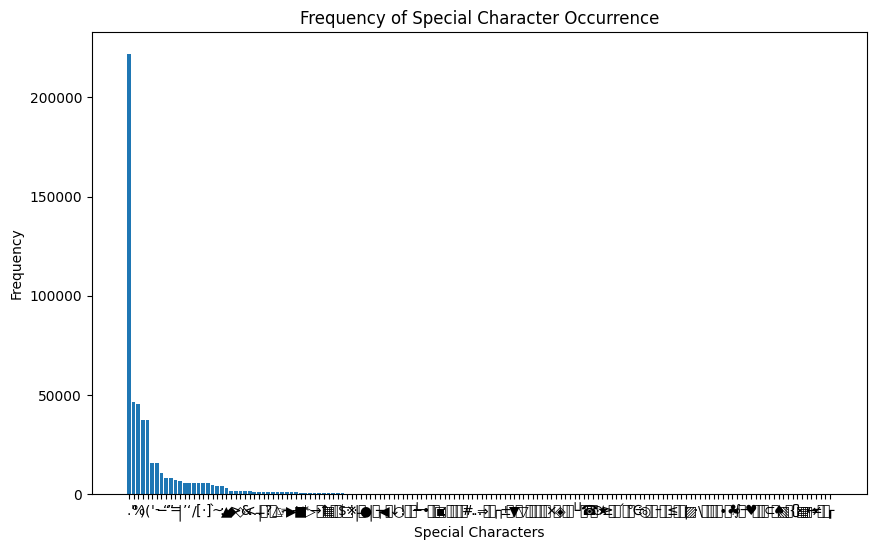

In [7]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# 'text' 칼럼에서 특수문자 추출
special_chars = ''.join(re.findall(r'[^\w\s]', ''.join(df_sample['text'])))

# 특수문자 빈도 계산
char_freq = Counter(special_chars)

# 빈도순으로 정렬
sorted_chars = sorted(char_freq.items(), key=lambda x: x[1], reverse=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar([item[0] for item in sorted_chars], [item[1] for item in sorted_chars])
plt.xlabel('Special Characters')
plt.ylabel('Frequency')
plt.title('Frequency of Special Character Occurrence')
plt.show()

### 2-c-3. 테스트 : 빈도 순으로 어떤 특수문자가 많은지 확인

In [8]:
sorted_chars

[('.', 221794),
 ('"', 46437),
 ('%', 45644),
 (')', 37274),
 ('(', 37211),
 ("'", 15639),
 ('-', 15489),
 ('─', 10540),
 ('“', 7994),
 ('”', 7966),
 ('=', 7107),
 ('│', 6497),
 ('’', 5692),
 ('‘', 5663),
 ('/', 5539),
 ('[', 5404),
 ('·', 5388),
 (']', 5352),
 ('`', 4744),
 ('~', 4143),
 (':', 4023),
 ('▲', 3009),
 ('◆', 1770),
 ('>', 1596),
 ('◇', 1570),
 ('&', 1522),
 ('<', 1328),
 ('…', 1225),
 ('┼', 1197),
 ('ⓒ', 1174),
 ('?', 1170),
 ('＜', 1108),
 ('△', 1103),
 ('☞', 1085),
 ('∼', 1067),
 ('▶', 1022),
 ('+', 1005),
 ('■', 730),
 ('*', 699),
 ('▷', 652),
 ('→', 490),
 ('，', 435),
 ('↑', 362),
 ('▦', 348),
 ('【', 327),
 ('】', 327),
 ('$', 324),
 ('□', 285),
 ('※', 281),
 ('├', 270),
 ('㎡', 260),
 ('●', 256),
 ('┤', 256),
 ('＊', 224),
 ('┬', 208),
 ('◀', 197),
 ('：', 172),
 ('↓', 171),
 ('○', 170),
 ('!', 150),
 ('㈜', 135),
 ('％', 129),
 ('┴', 103),
 ('―', 98),
 ('•', 90),
 ('－', 88),
 ('\U000f03da', 78),
 ('▣', 66),
 (';', 66),
 ('？', 64),
 ('《', 63),
 ('》', 61),
 ('＋', 49),
 ('#',

### 2-c-4. 테스트 : 남길 특수문자 선정 

In [9]:
special_char_list = ['.', '"', '%', ')', '(', "'", '-', '─', '“', '”', '=', '│', 
                     '’', '‘', '/', '[', '·', ']', '`', '~', ':', '>', '&', '<', '?']
for char in special_char_list:
    print(char)

.
"
%
)
(
'
-
─
“
”
=
│
’
‘
/
[
·
]
`
~
:
>
&
<
?


### 2-c-5. 테스트 : 없앨 특수문자 리스트 만들기
- 공백문자(" ")로 변경할 것이다

In [10]:
delete_char_list = [char for char, freq in sorted_chars if char not in special_char_list]
delete_char_list

['▲',
 '◆',
 '◇',
 '…',
 '┼',
 'ⓒ',
 '＜',
 '△',
 '☞',
 '∼',
 '▶',
 '+',
 '■',
 '*',
 '▷',
 '→',
 '，',
 '↑',
 '▦',
 '【',
 '】',
 '$',
 '□',
 '※',
 '├',
 '㎡',
 '●',
 '┤',
 '＊',
 '┬',
 '◀',
 '：',
 '↓',
 '○',
 '!',
 '㈜',
 '％',
 '┴',
 '―',
 '•',
 '－',
 '\U000f03da',
 '▣',
 ';',
 '？',
 '《',
 '》',
 '＋',
 '#',
 '․',
 '‥',
 '⇒',
 '「',
 '」',
 '┌',
 '┐',
 '±',
 '～',
 '▼',
 '㎞',
 '▽',
 '＆',
 '㎏',
 '．',
 '〔',
 '〕',
 '×',
 '〃',
 '◈',
 '『',
 '＝',
 '└',
 '┘',
 '』',
 '☎',
 'ⓤ',
 '⊙',
 '★',
 '≥',
 '＞',
 'ⓝ',
 '´',
 '｜',
 '／',
 '℃',
 '÷',
 '◎',
 '㎢',
 '〉',
 '–',
 'ⓢ',
 '〈',
 '≤',
 '［',
 '］',
 '|',
 '▨',
 '‧',
 '\\',
 '〓',
 '＃',
 '（',
 '）',
 '∙',
 '㎜',
 '♣',
 '∮',
 '\uf0e0',
 '—',
 '♥',
 '＄',
 '㎰',
 '㎝',
 '⊂',
 '㎥',
 '♠',
 '▧',
 '\U00101f57',
 '{',
 '}',
 '▤',
 '▥',
 '↔',
 '≠',
 '、',
 '㎿',
 '┎']

### 2-c-6. 테스트 : 불필요한 특수문자 없애기

In [11]:
for char in delete_char_list:
    df_sample['text'] = df_sample['text'].str.replace(char, " ")

df_sample.head()

,search_keyword,created_date,created_time,media,title,text,url
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경기 위축 우...,https://n.news.naver.com/mnews/article/013/000...
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경...,https://n.news.naver.com/mnews/article/001/000...
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인 광주= 전남도 행정부지사 출신 무소속 김영록...,https://n.news.naver.com/mnews/article/003/000...
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...


### 2-c-7. 테스트 : 특수문자 분포 확인
- 잘 적용되었다

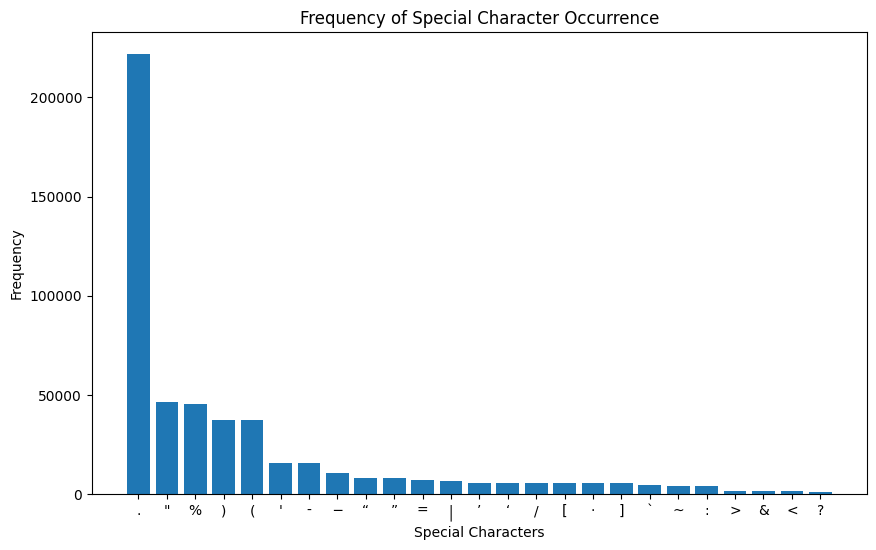

In [12]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# 'text' 칼럼에서 특수문자 추출
special_chars_new = ''.join(re.findall(r'[^\w\s]', ''.join(df_sample['text'])))

# 특수문자 빈도 계산
char_freq = Counter(special_chars_new)

# 빈도순으로 정렬
sorted_chars_new = sorted(char_freq.items(), key=lambda x: x[1], reverse=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar([item[0] for item in sorted_chars_new], [item[1] for item in sorted_chars_new])
plt.xlabel('Special Characters')
plt.ylabel('Frequency')
plt.title('Frequency of Special Character Occurrence')
plt.show()

## 2-d. 실제 df에 적용 :  불필요한 특수문자 제거 

### 2-d-1. 실전 : delete_char_list 만들기

In [13]:
# 'text' 칼럼에서 특수문자 추출
special_chars_original = ''.join(re.findall(r'[^\w\s]', ''.join(df['text'])))

# 특수문자 빈도 계산
char_freq = Counter(special_chars_original)

# 빈도순으로 정렬
sorted_chars_original = sorted(char_freq.items(), key=lambda x: x[1], reverse=True)

In [14]:
sorted_chars_original

[('.', 37948957),
 ('%', 8776032),
 ('(', 7339550),
 (')', 7324241),
 ('"', 6061863),
 ("'", 3267264),
 ('·', 2347573),
 ('“', 1925221),
 ('”', 1911142),
 ('-', 1806087),
 ('’', 1401703),
 ('‘', 1398603),
 ('=', 1140918),
 ('[', 1087695),
 (']', 1075732),
 ('~', 862863),
 ('/', 554761),
 ('…', 478243),
 ('─', 477291),
 ('?', 401863),
 ('>', 381070),
 (':', 358961),
 ('▲', 313641),
 ('&', 300155),
 ('│', 276903),
 ('<', 270505),
 ('`', 255221),
 ('△', 252890),
 ('◆', 234287),
 ('▶', 218851),
 ('◇', 209819),
 ('∼', 182811),
 ('㎡', 146324),
 ('+', 137730),
 ('■', 122698),
 ('→', 122318),
 ('☞', 107920),
 ('【', 70293),
 ('】', 65431),
 ('▷', 65178),
 ('*', 64598),
 ('!', 61001),
 ('◀', 54525),
 ('↑', 50920),
 ('┼', 46050),
 ('©', 40280),
 ('━', 35089),
 ('↓', 32718),
 ('○', 26914),
 ('％', 23430),
 ('ⓒ', 22773),
 ('□', 21321),
 ('▦', 20899),
 ('㈜', 18926),
 ('#', 18251),
 ('，', 16263),
 ('※', 15881),
 ('‧', 15807),
 ('＜', 14218),
 ('|', 14109),
 ('―', 13574),
 ('├', 13324),
 ('┤', 13122),
 (

In [15]:
special_char_list = ['.', '"', '%', ')', '(', "'", '-', '─', '“', '”', '=',  
                     '’', '‘', '/', '[', '·', ']', '`', '~', ':', '>', '&', '<', '?', '`']

In [16]:
delete_char_list = [char for char, freq in sorted_chars if char not in special_char_list]
delete_char_list

['│',
 '▲',
 '◆',
 '◇',
 '…',
 '┼',
 'ⓒ',
 '＜',
 '△',
 '☞',
 '∼',
 '▶',
 '+',
 '■',
 '*',
 '▷',
 '→',
 '，',
 '↑',
 '▦',
 '【',
 '】',
 '$',
 '□',
 '※',
 '├',
 '㎡',
 '●',
 '┤',
 '＊',
 '┬',
 '◀',
 '：',
 '↓',
 '○',
 '!',
 '㈜',
 '％',
 '┴',
 '―',
 '•',
 '－',
 '\U000f03da',
 '▣',
 ';',
 '？',
 '《',
 '》',
 '＋',
 '#',
 '․',
 '‥',
 '⇒',
 '「',
 '」',
 '┌',
 '┐',
 '±',
 '～',
 '▼',
 '㎞',
 '▽',
 '＆',
 '㎏',
 '．',
 '〔',
 '〕',
 '×',
 '〃',
 '◈',
 '『',
 '＝',
 '└',
 '┘',
 '』',
 '☎',
 'ⓤ',
 '⊙',
 '★',
 '≥',
 '＞',
 'ⓝ',
 '´',
 '｜',
 '／',
 '℃',
 '÷',
 '◎',
 '㎢',
 '〉',
 '–',
 'ⓢ',
 '〈',
 '≤',
 '［',
 '］',
 '|',
 '▨',
 '‧',
 '\\',
 '〓',
 '＃',
 '（',
 '）',
 '∙',
 '㎜',
 '♣',
 '∮',
 '\uf0e0',
 '—',
 '♥',
 '＄',
 '㎰',
 '㎝',
 '⊂',
 '㎥',
 '♠',
 '▧',
 '\U00101f57',
 '{',
 '}',
 '▤',
 '▥',
 '↔',
 '≠',
 '、',
 '㎿',
 '┎']

### 2-d-2. 실전 : df에 적용

In [17]:
for char in delete_char_list:
    df['text'] = df['text'].str.replace(char, " ")

df.head()

,search_keyword,created_date,created_time,media,title,text,url
0,금리,2008-04-10,00:03:00,강원일보,소상공인·소기업 대상 NH 뉴 스타트론 판매,강원농협(본부장:김명기)은 영세자영업자를 위한 ‘NH 뉴 스타트론’을 10일부터 판...,https://n.news.naver.com/mnews/article/087/000...
1,금리,2008-04-10,00:18:00,연합인포맥스,"美 국채가, 경기 위축 우려 지속 상승",(뉴욕=) 김홍규 특파원 = 미국 국채가격은 9일 뉴욕채권시장에서 경기 위축 우...,https://n.news.naver.com/mnews/article/013/000...
2,금리,2008-04-10,00:19:28,연합뉴스,<여대야소..MB노믹스 속도낸다>,(서울=) 재경팀= 18대 총선이 여당의 과반 확보로 마무리되면서 이명박 정부의 경...,https://n.news.naver.com/mnews/article/001/000...
3,금리,2008-04-10,00:22:00,뉴시스,"<화제의 당선인>김영록, 행정가 출신의 대이변",환호하는 김영록 해남.완도.진도 당선인 광주= 전남도 행정부지사 출신 무소속 김영록...,https://n.news.naver.com/mnews/article/003/000...
4,금리,2008-04-10,00:25:00,경향신문,[사설]우려되는 대통령의 ‘경기 부양’ 지시,역시 강만수 기획재정부 장관은 이명박 대통령의 생각을 잘 읽는다는 사실이 그제 국무...,https://n.news.naver.com/mnews/article/032/000...


### 2-d-3. 실전 : 적용된 결과 - 특수문자 분포 확인
- 잘 적용되었다

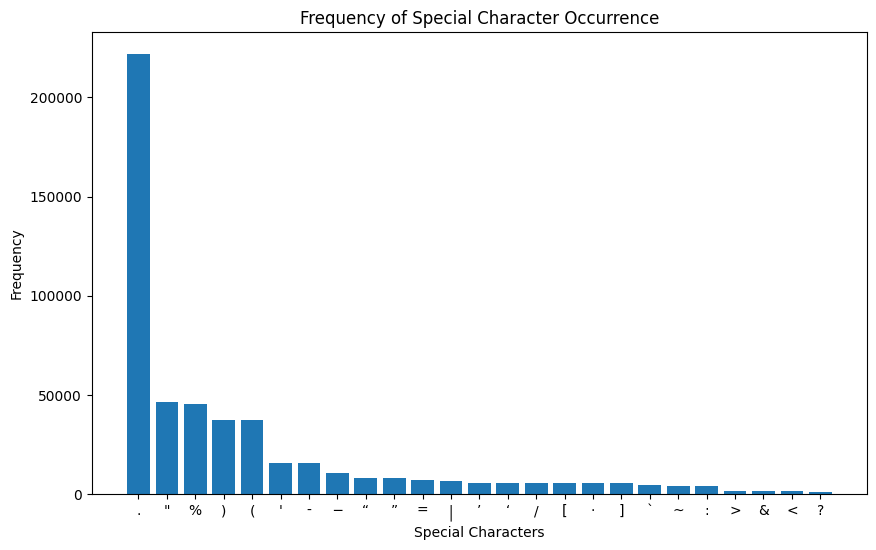

In [18]:
# 'text' 칼럼에서 특수문자 추출
special_chars_original = ''.join(re.findall(r'[^\w\s]', ''.join(df['text'])))

# 특수문자 빈도 계산
char_freq = Counter(special_chars_original)

# 빈도순으로 정렬
sorted_chars_original = sorted(char_freq.items(), key=lambda x: x[1], reverse=True)

# 시각화
plt.figure(figsize=(10, 6))
plt.bar([item[0] for item in sorted_chars_new], [item[1] for item in sorted_chars_new])
plt.xlabel('Special Characters')
plt.ylabel('Frequency')
plt.title('Frequency of Special Character Occurrence')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1601160 entries, 0 to 1602718
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   search_keyword  1601160 non-null  object
 1   created_date    1601160 non-null  object
 2   created_time    1601160 non-null  object
 3   media           1601160 non-null  object
 4   title           1601160 non-null  object
 5   text            1601160 non-null  object
 6   url             1601160 non-null  object
dtypes: object(7)
memory usage: 97.7+ MB


### 2-e-4. 실전 : 파일로 저장 - 불필요한 특수문자가 제거됨

In [20]:
file_path = "2_deleted_some_special_chars.csv"
df.to_csv(file_path, index=False, encoding="utf-8")